In [1]:
import numpy as np
import sympy as sp
import matplotlib
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
%matplotlib inline 
%precision 5

u'%.5f'

In [2]:
## Read in a mesh 
meshfile = open("PlateMeshOrdered.txt",'r').readlines()
n_node = int(meshfile[1])
node_X = np.zeros((n_node,2))
for i in range(n_node):
    aux = meshfile[2+i].split()
    node_X[i,0] = float(aux[0])
    node_X[i,1] = float(aux[1])
n_elem = int(meshfile[3+n_node])
elements = np.zeros((n_elem,3),dtype=int)
for i in range(n_elem):
    aux = meshfile[4+n_node+i].split()
    elements[i,0] = int(aux[0])
    elements[i,1] = int(aux[1])
    elements[i,2] = int(aux[2])

In [3]:
## function of exact solution
def exact_solution(x,y):
    a = 0.25
    b = 1.
    return x**2+y**2-2*a*np.sqrt(x**2+y**2)+a**2

In [4]:
##  Fill out the nodal values with the exact solution
d_exact = np.zeros((n_node))
for i in range(n_node):
    d_exact[i] = exact_solution(node_X[i,0],node_X[i,1])

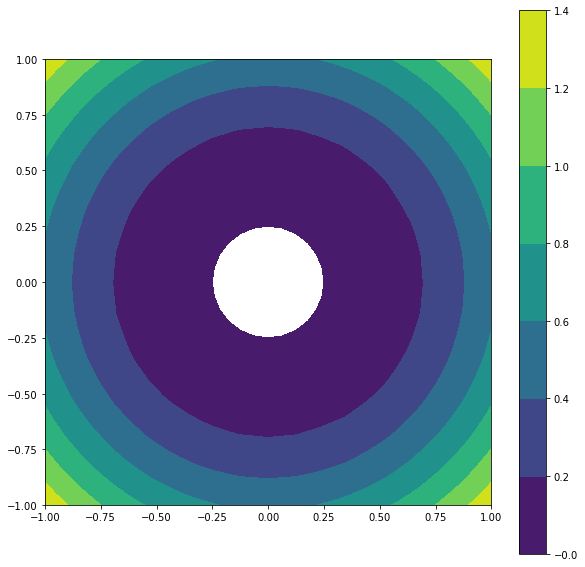

In [5]:
## Plot
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
levels = [-0.00001, 0.2, 0.4, 0.6, 0.8, 1., 1.2, 1.4]
plt.tricontourf(node_X[:,0],node_X[:,1] ,  elements-1, d_exact, levels)
plt.colorbar()